## <p style = 'text-align: center'>CUSTOMER SEGMENTATION USING KMEANS CLUSTERING</p>
---




<p align="center">
<img src="k-means-clustering-algorithm-in-machine-learning.png" width="800" height="300" />
</p>

## Importing the necessary Libraries


In [149]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering
sns.set(style = 'darkgrid')

In [150]:
!pip install yellowbrick

In [151]:
df = pd.read_csv(r'C:\Users\Bildad Otieno\Documents\Billy_Repo\Customer_Segmentation\marketing_campaign.xls', sep = '\t')
df.index = df.index +1
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
2,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
3,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
4,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
5,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [152]:
# The dimensions of the dataset, we have 200 records and 5 Columns
df.shape

(2240, 29)

In [153]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [154]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [155]:
df.dropna(inplace=True)

In [156]:
df.drop_duplicates(inplace=True)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 1 to 2240
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [158]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [159]:
#Dt_Customer indicates date Customer joined database
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

C:\Users\Bildad Otieno\AppData\Local\Temp\ipykernel_20372\2781831106.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


In [160]:
df['Dt_Customer'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2216 entries, 1 to 2240
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2216 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 34.6 KB


In [161]:
print('Last customer registered date:',max(df['Dt_Customer']))
print('Earliest customer registered date:',min(df['Dt_Customer']))

Last customer registered date: 2014-12-06 00:00:00
Earliest customer registered date: 2012-01-08 00:00:00


In [162]:
#Finding the relative time one has been a customer

End_date = max(df['Dt_Customer'])
Duration = []
for d in df['Dt_Customer']:
    diff = End_date - d
    diff = pd.Timedelta(diff)
    Duration.append(diff.days)

In [163]:
#Assigning the dates as a column within the dataframe
df['Customer_For (Days)'] = Duration

In [164]:
df['Cust_Age'] = 2023 - df['Year_Birth']

In [165]:
#Calculating total expenditure per customer
df['Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [166]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For (Days),Cust_Age,Spent
1,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,3,11,1,971,66,1617
2,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,3,11,0,125,69,27
3,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,472,58,776
4,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,3,11,0,65,39,53
5,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,321,42,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2236,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,3,11,0,541,56,1341
2237,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,0,1,0,0,3,11,0,61,77,444
2238,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,0,3,11,0,315,42,1241
2239,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,3,11,0,316,67,843


In [167]:
#Reducing Categorical Values in Marital_Status to Partner and Alone
df['Lives_With'] = df['Marital_Status'].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

In [168]:
#Merging values in columns Kidhome and Teenhome
df["No_of_Children"] = df['Kidhome'] + df['Teenhome'] 

In [169]:
#Creating a new Column "Family_Size" indicating size of Customer Household
df['Lives_With'].replace({"Alone":1, "Partner":2}, inplace=True)

df["Family_Size"] = df['Lives_With'] + df['No_of_Children']

In [170]:
#If the condition is true (i.e., if the value in the "Children" column is greater than 0), the corresponding element in the new "Is_Parent" column is set to 1. If the condition is false, the corresponding element is set to 0.
df['Is_Parent'] = np.where(df['No_of_Children'] > 0,1,0)

In [171]:
#Reducing Categorical Values of Education into 3: UnderGrad, Grad, PostGrad
df["Education"] = df['Education'].replace({"Basic":"UnderGrad", "2n Cycle":"UnderGrad", "PhD":"PostGrad", "Graduation":"Grad", "Master":"Grad"})

In [172]:
#Renaming Columns
df = df.rename(columns={"MntWines":"Wines", "MntFruits":"Fruits", "MntMeatProducts":"Meat", "MntFishProducts":"Fish", "MntSweetProducts":"Sweets", "MntGoldProds":"Gold"})

In [173]:
#Retaining the new features generated and removing the old ones
df = df.drop(columns={'Dt_Customer', 'Marital_Status', 'Kidhome', 'Teenhome', 'Year_Birth', 'ID', 'Z_CostContact', 'Z_Revenue', 'Lives_With', 'Complain', 'Response'})

C:\Users\Bildad Otieno\AppData\Local\Temp\ipykernel_20372\3558545500.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  sns.pairplot(df[{"Income", "Recency", "Customer_For (Days)", "Cust_Age", "Spent", "Is_Parent"}], hue = "Is_Parent")


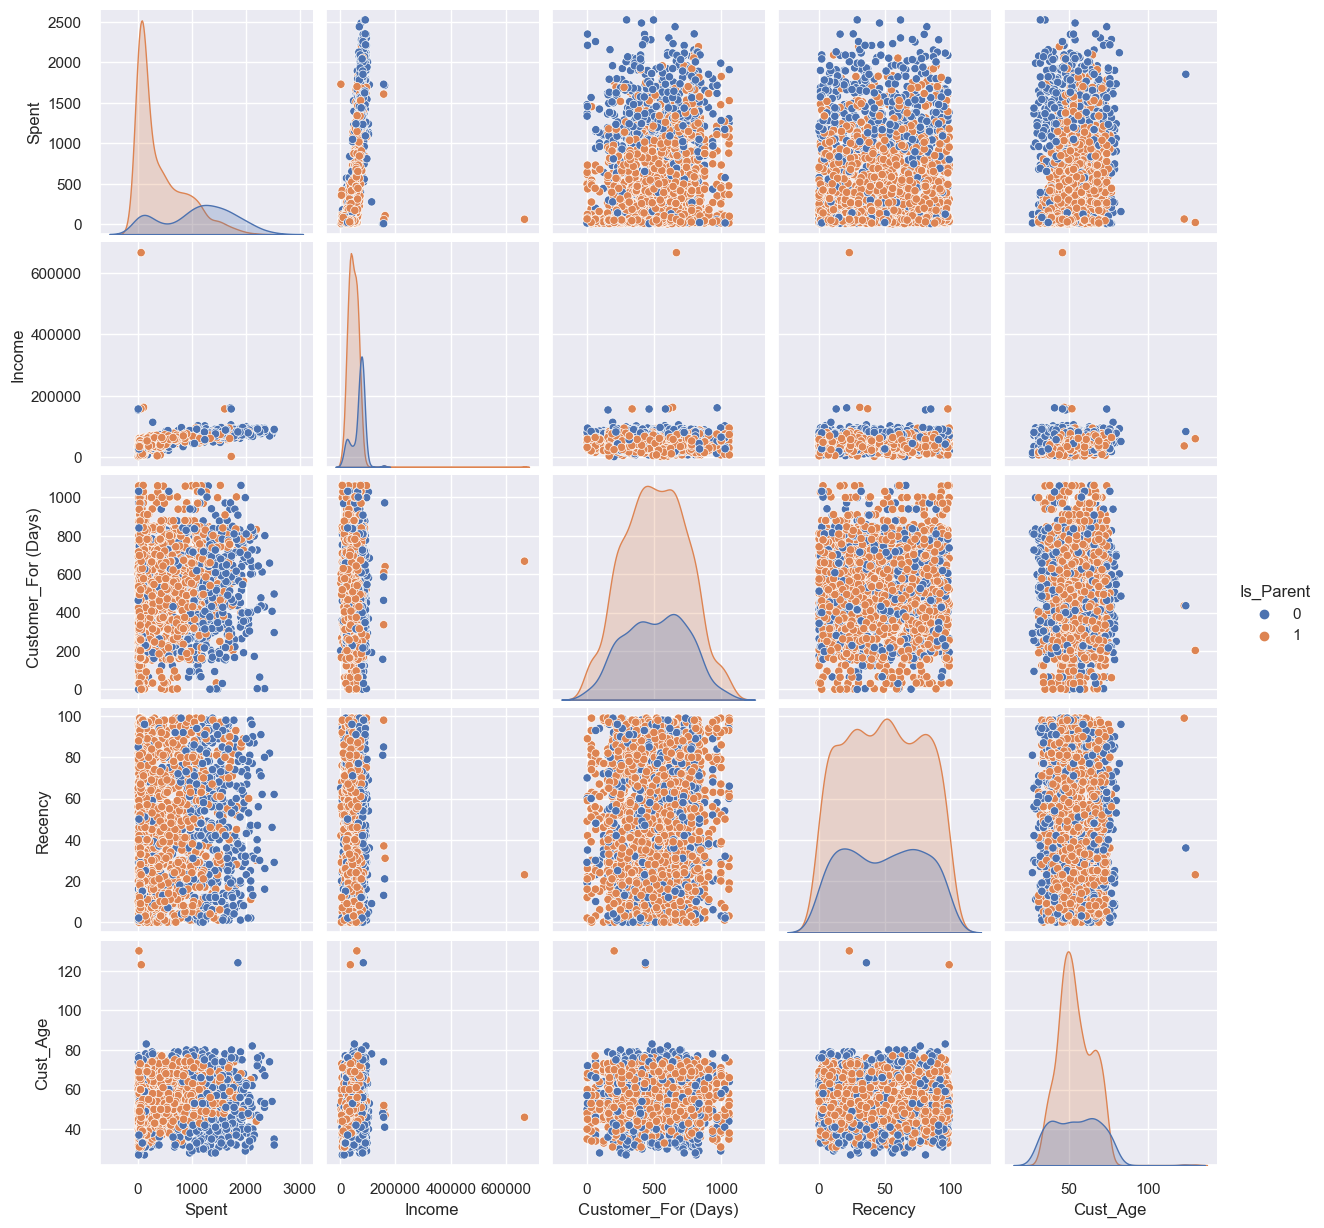

In [174]:
sns.pairplot(df[{"Income", "Recency", "Customer_For (Days)", "Cust_Age", "Spent", "Is_Parent"}], hue = "Is_Parent")

In [175]:
df = df[df["Cust_Age"]<90]
df = df[df['Income'] < 600000]

In [176]:
df.columns

Index(['Education', 'Income', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Customer_For (Days)', 'Cust_Age', 'Spent',
       'No_of_Children', 'Family_Size', 'Is_Parent'],
      dtype='object')

C:\Users\Bildad Otieno\AppData\Local\Temp\ipykernel_20372\2022638643.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Axes: >

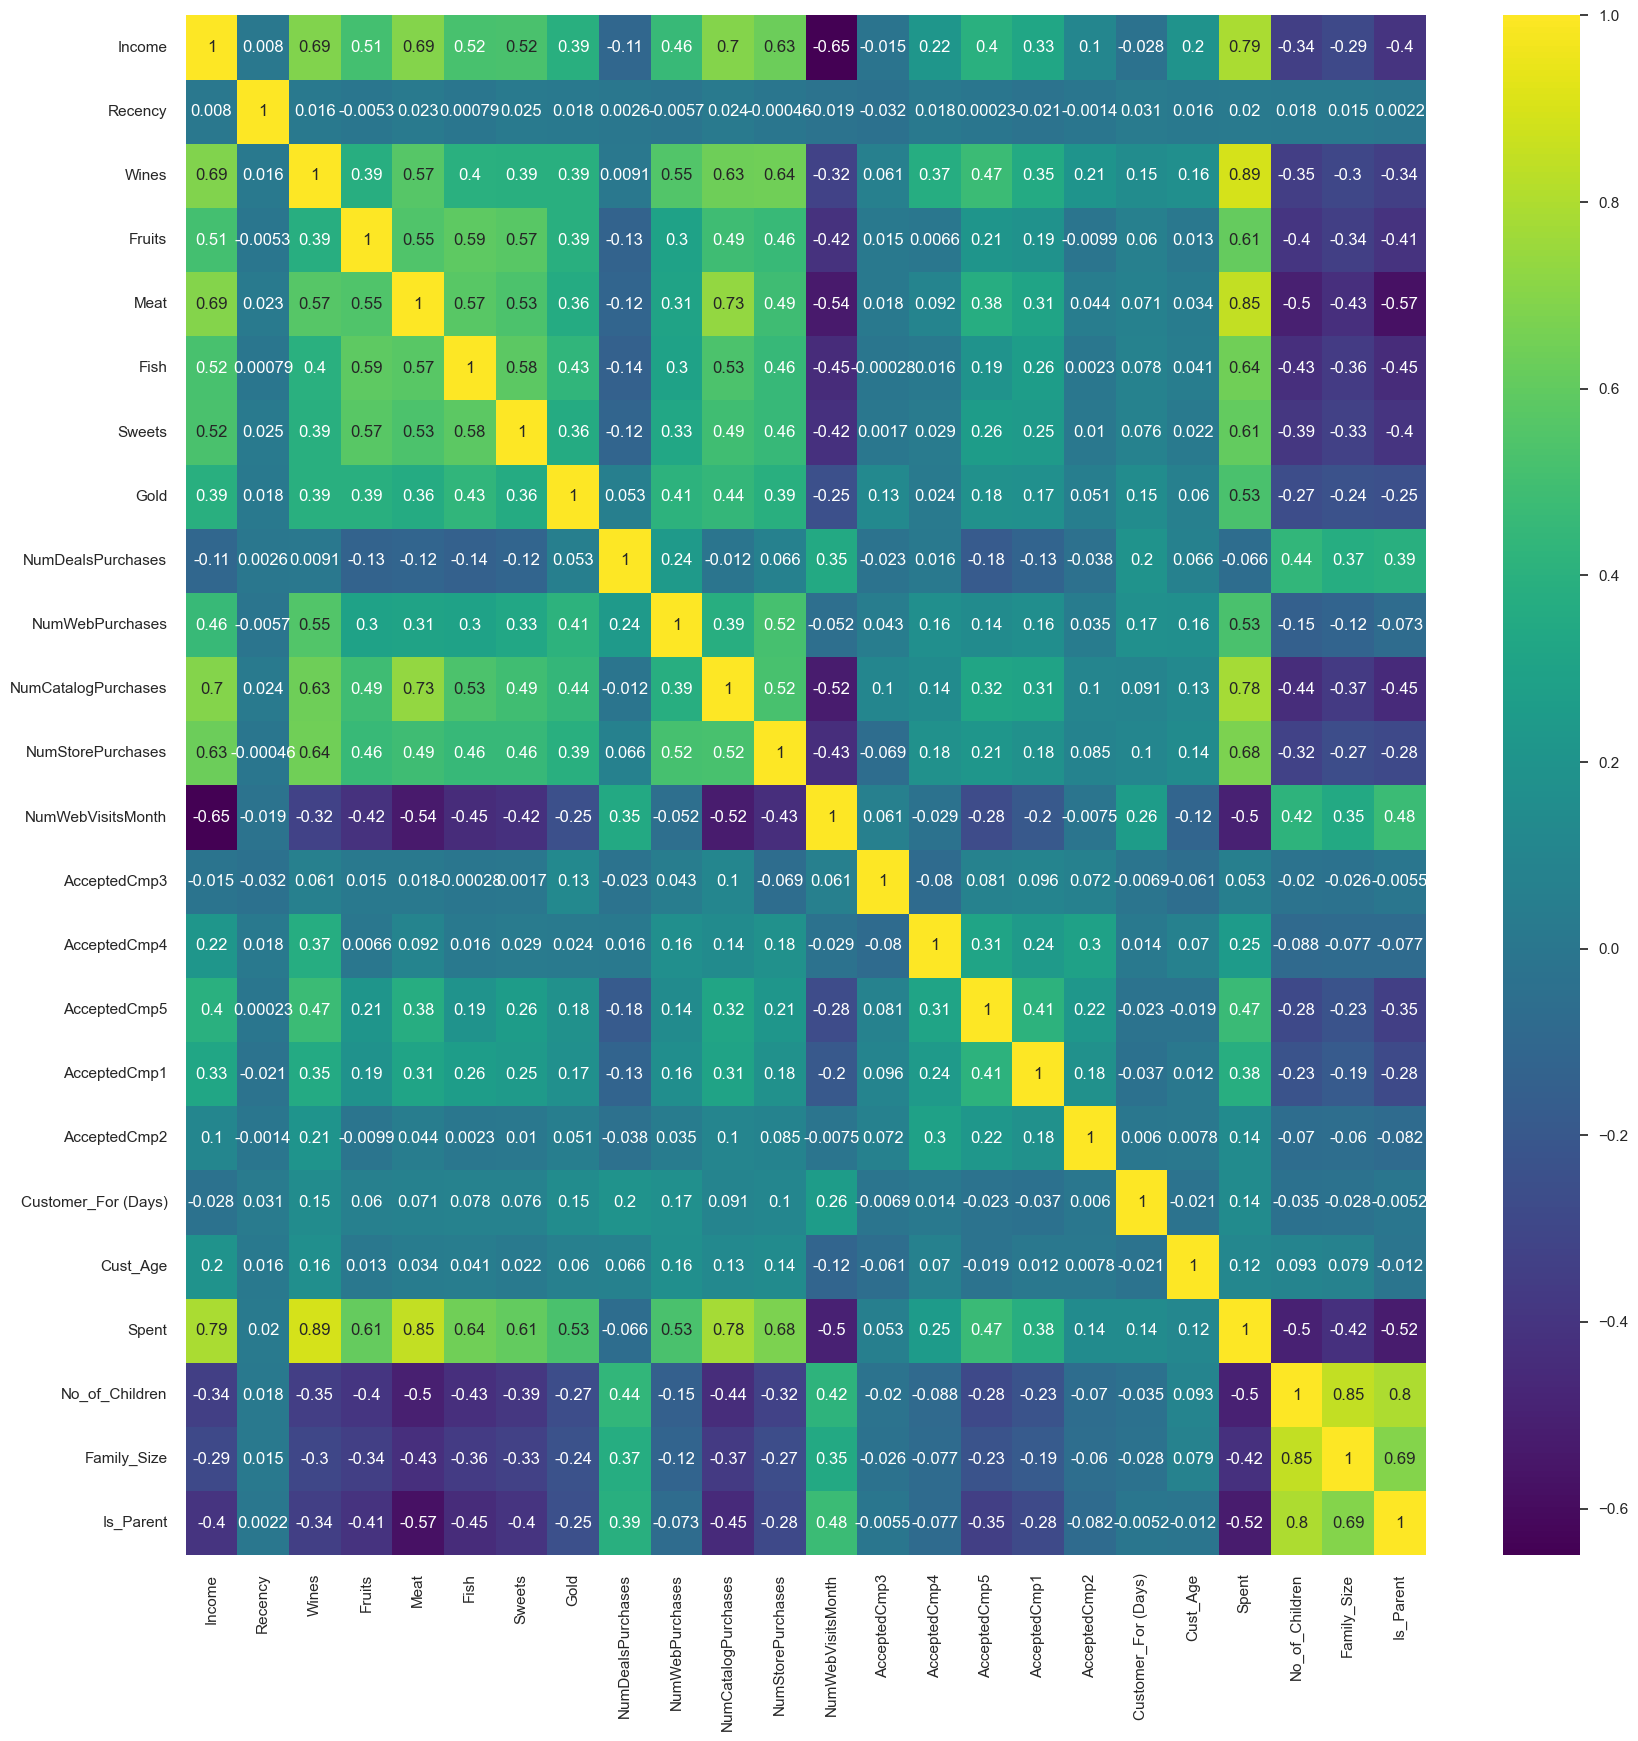

In [177]:
correlation_matrix = df.corr()
plt.figure(figsize = (20,20))
sns.heatmap(correlation_matrix, annot = True, cmap = 'viridis')

In [178]:
for column_name, dt in df.dtypes.items():
    if dt == 'object':
        print(f"{column_name}: {dt}")


Education: object


In [179]:
#Performing Label Encoding
enc = LabelEncoder()
df['Education'] = df[['Education']].apply(enc.fit_transform)

In [180]:
df['Education'].value_counts()

0    1480
1     480
2     252
Name: Education, dtype: int64

In [181]:
scaler = StandardScaler()

scaler.fit(df)

scaled_df = pd.DataFrame(scaler.transform(df), columns = df.columns)
scaled_df

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Customer_For (Days),Cust_Age,Spent,No_of_Children,Family_Size,Is_Parent
0,-0.645583,0.287105,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,...,-0.282981,-0.280175,-0.261914,-0.117256,1.973583,1.018352,1.676245,-1.264598,-1.758359,-1.581139
1,-0.645583,-0.260882,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,...,-0.282981,-0.280175,-0.261914,-0.117256,-1.665144,1.274785,-0.963297,1.404572,0.449070,0.632456
2,-0.645583,0.913196,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,...,-0.282981,-0.280175,-0.261914,-0.117256,-0.172664,0.334530,0.280110,-1.264598,-0.654644,-1.581139
3,-0.645583,-1.176114,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,...,-0.282981,-0.280175,-0.261914,-0.117256,-1.923210,-1.289547,-0.920135,0.069987,0.449070,0.632456
4,0.805666,0.294307,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,...,-0.282981,-0.280175,-0.261914,-0.117256,-0.822130,-1.033114,-0.307562,0.069987,0.449070,0.632456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,-0.645583,0.430444,-0.104347,1.197084,0.419540,0.066770,0.079461,2.213965,3.928291,-0.168701,...,-0.282981,-0.280175,-0.261914,-0.117256,0.124112,0.163575,1.218061,0.069987,0.449070,0.632456
2208,0.805666,0.560123,0.241237,0.298631,-0.662628,-0.611184,-0.687527,-0.658360,-0.694954,2.429954,...,-0.282981,-0.280175,3.818045,-0.117256,-1.940414,1.958607,-0.271040,2.739158,2.656499,0.632456
2209,-0.645583,0.233347,1.450778,1.787156,0.545373,0.222878,-0.103155,-0.366260,-0.385448,-0.688432,...,3.533809,-0.280175,-0.261914,-0.117256,-0.847936,-1.033114,1.052052,-1.264598,-1.758359,-1.581139
2210,-0.645583,0.803172,-1.417564,0.363866,0.092373,0.209498,0.773403,0.071892,0.330284,-0.168701,...,-0.282981,-0.280175,-0.261914,-0.117256,-0.843635,1.103830,0.391336,0.069987,0.449070,0.632456


In [182]:
#Using PCA to reduce dimensions(features) to 3 
pca = PCA(n_components=3)
pca.fit(scaled_df)
PCA_df = pd.DataFrame(pca.transform(scaled_df), columns = (['Col1', 'Col2', 'Col3']))

In [183]:
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Col1,2212.0,-2.377042e-16,2.854726,-5.692691,-2.499973,-0.935591,2.235323,8.377680
Col2,2212.0,9.636656e-17,1.543421,-3.962489,-1.101003,-0.201577,1.038222,5.785262
Col3,2212.0,-8.030546e-18,1.313645,-3.177383,-0.579541,-0.035364,0.248780,9.257262


In [184]:
x = PCA_df['Col1']
y = PCA_df['Col2']
z = PCA_df['Col3']

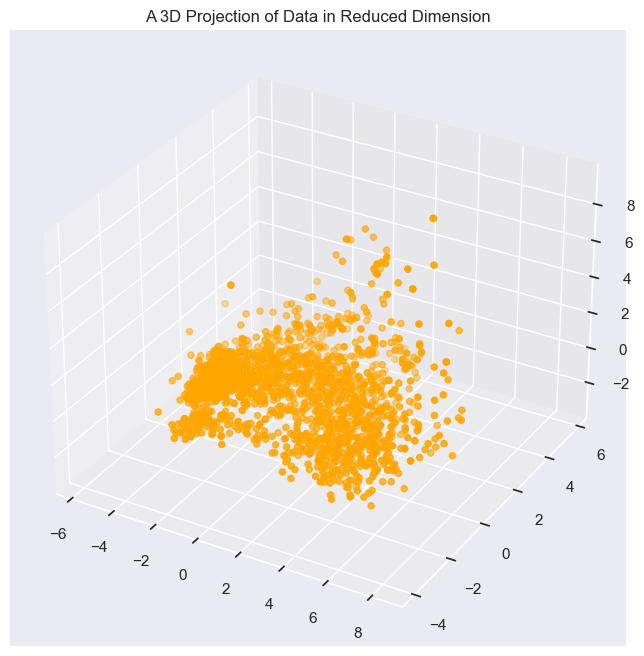

In [185]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection = '3d')
ax.set_title("A 3D Projection of Data in Reduced Dimension")
ax.scatter(x,y,z, c = 'orange')

c:\Users\Bildad Otieno\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Bildad Otieno\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Bildad Otieno\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Bildad Otieno\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

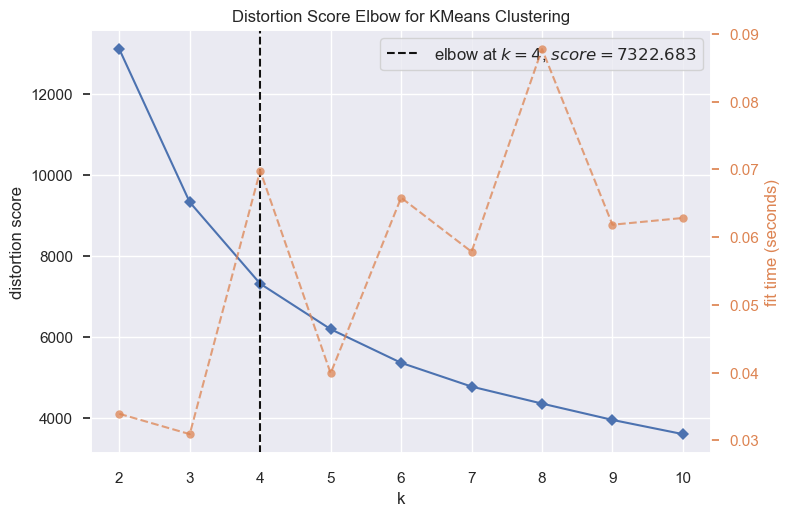

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [186]:
#Elbow Method to Determine the Optimum Number of CLusters
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df)
Elbow_M.show()

In [187]:
AC = AgglomerativeClustering(n_clusters=4)

yhat_AC = AC.fit_predict(PCA_df)
PCA_df["Clusters"] = yhat_AC

In [188]:
df['Clusters'] = yhat_AC

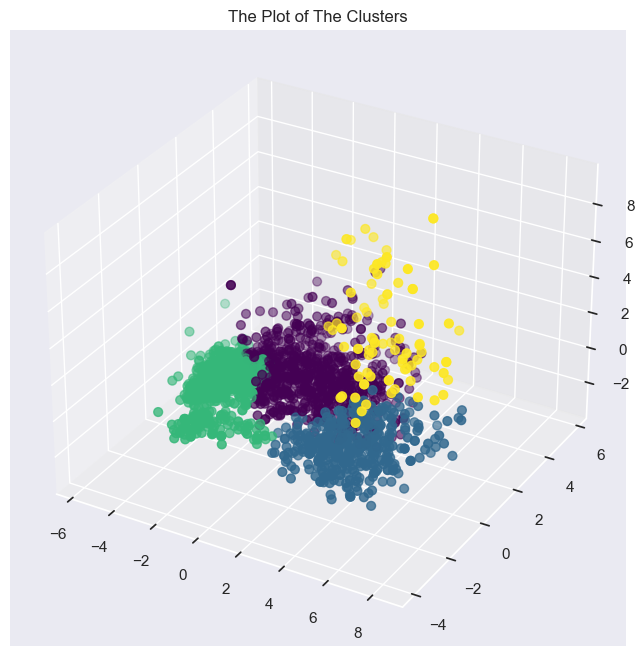

In [189]:
fig = plt.figure(figsize = (10,8))
ax = plt.subplot(111, projection = '3d', label = "bla")
ax.scatter(x,y,z, s = 40, c = PCA_df["Clusters"], marker = 'o', cmap = "viridis")
ax.set_title("The Plot of The Clusters")
plt.show()

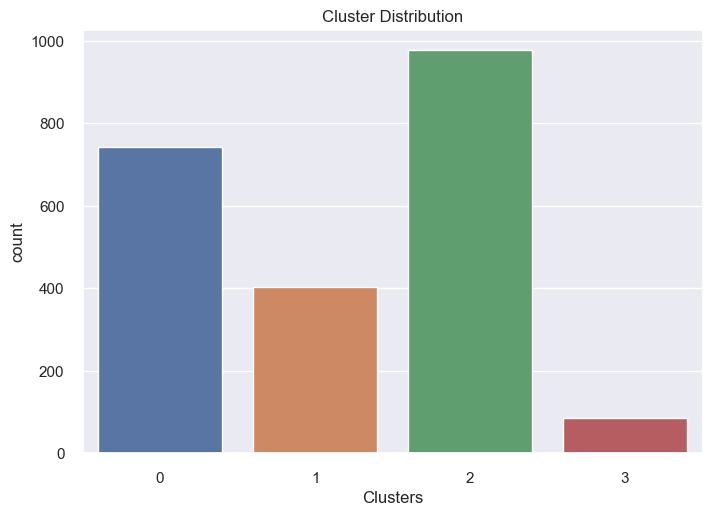

In [190]:
figure = sns.countplot(x= df['Clusters'], palette="deep")
figure.set_title("Cluster Distribution")
plt.show()

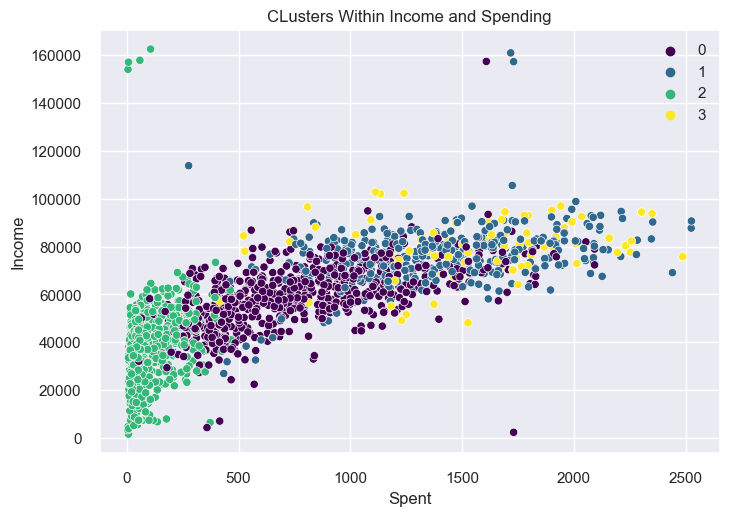

In [197]:
figure = sns.scatterplot(data = df, x = df['Spent'], y = df['Income'], hue = df['Clusters'], palette="viridis")
figure.set_title("CLusters Within Income and Spending")
figure.legend()

Text(0.5, 0, 'No. of Total Accepted Promos')

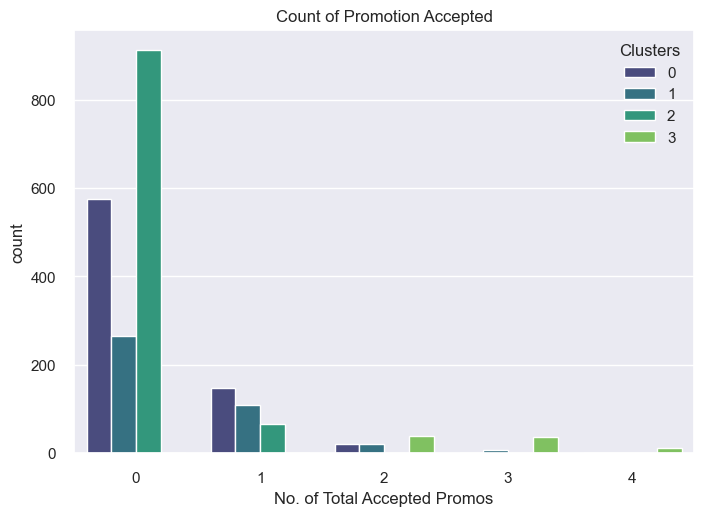

In [198]:
#Totaling Accepted Promotions
df['Total_Promos'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] +df['AcceptedCmp4'] + df['AcceptedCmp5']

figure = sns.countplot(x = df['Total_Promos'], hue = df['Clusters'], palette='viridis')

figure.set_title("Count of Promotion Accepted")
figure.set_xlabel("No. of Total Accepted Promos")


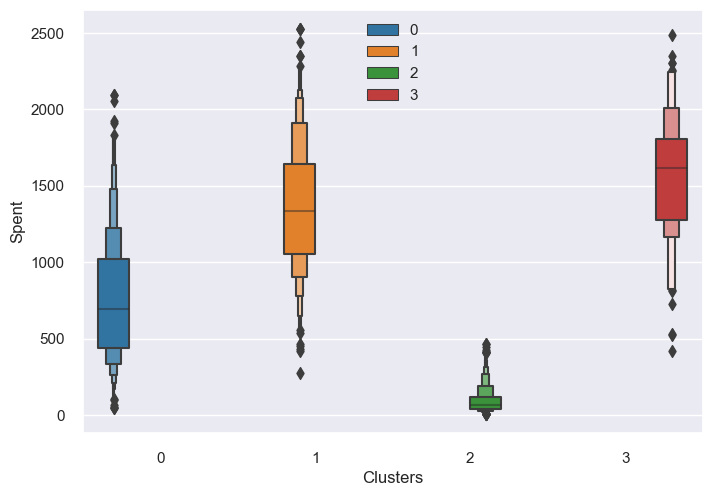

In [215]:
figure = sns.boxenplot(x = df['Clusters'], y = df['Spent'], hue = df['Clusters'], palette='tab10')
figure.legend(loc = 'upper center')

In [211]:
df

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,...,AcceptedCmp1,AcceptedCmp2,Customer_For (Days),Cust_Age,Spent,No_of_Children,Family_Size,Is_Parent,Clusters,Total_Promos
1,0,58138.0,58,635,88,546,172,88,88,3,...,0,0,971,66,1617,0,1,0,1,0
2,0,46344.0,38,11,1,6,2,1,6,2,...,0,0,125,69,27,2,3,1,2,0
3,0,71613.0,26,426,49,127,111,21,42,1,...,0,0,472,58,776,0,2,0,1,0
4,0,26646.0,26,11,4,20,10,3,5,2,...,0,0,65,39,53,1,3,1,2,0
5,1,58293.0,94,173,43,118,46,27,15,5,...,0,0,321,42,422,1,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2236,0,61223.0,46,709,43,182,42,118,247,2,...,0,0,541,56,1341,1,3,1,0,0
2237,1,64014.0,56,406,0,30,0,0,8,7,...,1,0,61,77,444,3,5,1,0,1
2238,0,56981.0,91,908,48,217,32,12,24,1,...,0,0,315,42,1241,0,1,0,0,1
2239,0,69245.0,8,428,30,214,80,30,61,2,...,0,0,316,67,843,1,3,1,0,0
